In [1]:
#Learning how to clean data and use it in a db and visualize it
#written by Vladimir Grinfelds
import pandas as pd

In [2]:
#reading in the csv im using
df = pd.read_csv("Calgary_Transit_Ridership_20251030.csv")


In [3]:
#dropping all the duplicates and replacing all the commas found in the csv with nothing
df = df.drop_duplicates()
df = df.replace(',','', regex=True)

#changing the option to see if changes are working
pd.set_option('display.max_rows', None)

In [4]:
#changing all the numerical values from str to int
ridership_cols = ['Year', 'Ridership', 'Youth Ridership', 'Adult Ridership', 'U-Pass Ridership']
temp_df = df[ridership_cols]

#dropping all NaN values so that I can turn the str to ints
temp_df = temp_df.dropna()
temp_df.astype(int)
#inserting the month back into the df
temp_df.insert(1, 'Month', df['Month'])
df = temp_df



In [5]:
#fixing the index of the df since I dropped NaN values
df = df.reset_index(drop = True)

In [6]:
#using sql alchemy to move the data to postgresql
from sqlalchemy import create_engine

In [7]:
#db connection details
db_user = 'vlad'
db_password = '59261'
db_host = 'localhost'
db_port = '5432'
db_name = 'calgary_bus_ridership'

conn_string = f"postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"

engine = create_engine(conn_string)

In [8]:
table_name =  'bus_ridership'

df.to_sql(table_name, con=engine, if_exists='replace', index=False)

217

In [14]:
import psycopg2

In [ ]:
conn = psycopg2.connect(
    user = 'vlad',
    password = '59261',
    host = 'localhost',
    port = '5432',
    dbname = 'calgary_bus_ridership'
    )

cur = conn.cursor()
#figure out how queries work along with psycopg2
cur.execute('SELECT "Ridership" FROM bus_ridership;')

rows = cur.fetchall()
for row in rows:
    print(row[0])

In [12]:
import matplotlib.pyplot as plt

In [13]:
temp = 0
curr_year = 2025
avg_ridership = []
year = []
curr_index = 0

for i in df['Year']:
    if i == curr_year:
        value = df.at[curr_index,'Ridership']
        temp += int(value)
        curr_index += 1
    else:
        avg_ridership.append([temp / 12])
        year.append([curr_year])
        curr_year = curr_year - 1 
        temp = 0
        value = df.at[curr_index,'Ridership']
        temp += int(value)
        curr_index += 1


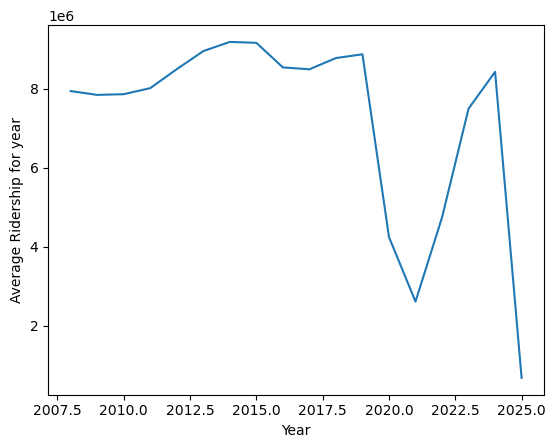

In [14]:
plt.plot(year, avg_ridership)
plt.xlabel("Year")
plt.ylabel("Average Ridership for year")
plt.show()

In [15]:
#figure out how to do the same but with db instead of df

df['Youth %'] = df['Youth Ridership'] / df['Ridership'] * 100
df['Adult %'] = df['Adult Ridership'] / df['Ridership'] * 100
df['U-Pass %'] = df['U-Pass Ridership'] / df['Ridership'] * 100

df.groupby('Year')[['Youth %', 'Adult %', 'U-Pass %']].mean().plot(kind='bar')
plt.title('Average Ridership Percentage by Category per Year')
plt.ylabel('Percentage (%)')
plt.show()


TypeError: unsupported operand type(s) for /: 'str' and 'str'